In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\ABC\\Desktop\\Seed_Data.csv")

In [3]:
df.shape

(210, 8)

In [4]:
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


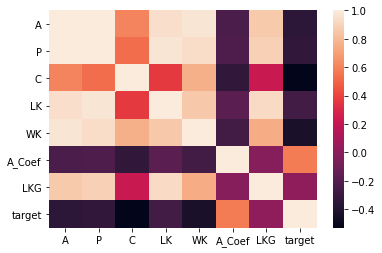

In [5]:
sns.heatmap(df.corr())

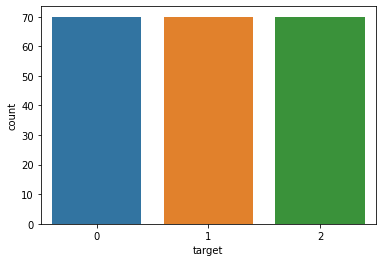

In [6]:
sns.countplot(df['target'])

In [7]:
df.corr()

,A,P,C,LK,WK,A_Coef,LKG,target
A,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
P,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
C,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
LK,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
WK,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
A_Coef,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
LKG,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
target,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [8]:
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1b7b3a70730>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7b3a70df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7b3a703d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7b3a7c4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7b3a7c7f0>],
 'means': []}

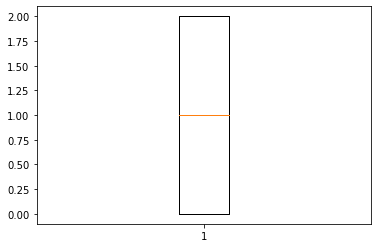

In [9]:
plt.boxplot(df['target'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LG
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [11]:
x = df.drop('target',axis  =1)
y = df['target']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 45)

In [13]:
x_train.shape,y_train.shape,x_test.shape,y_train.shape

((157, 7), (157,), (53, 7), (157,))

In [14]:
lr = LG()
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_predict = lr.predict(x_test)

In [16]:
y_predict

array([1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 2], dtype=int64)

In [17]:
lr.score(x_train,y_train)

0.9363057324840764

In [18]:
accuracy_score(y_test,y_predict)

0.9433962264150944

In [19]:
accuracy_score(y_train,y_train)

1.0

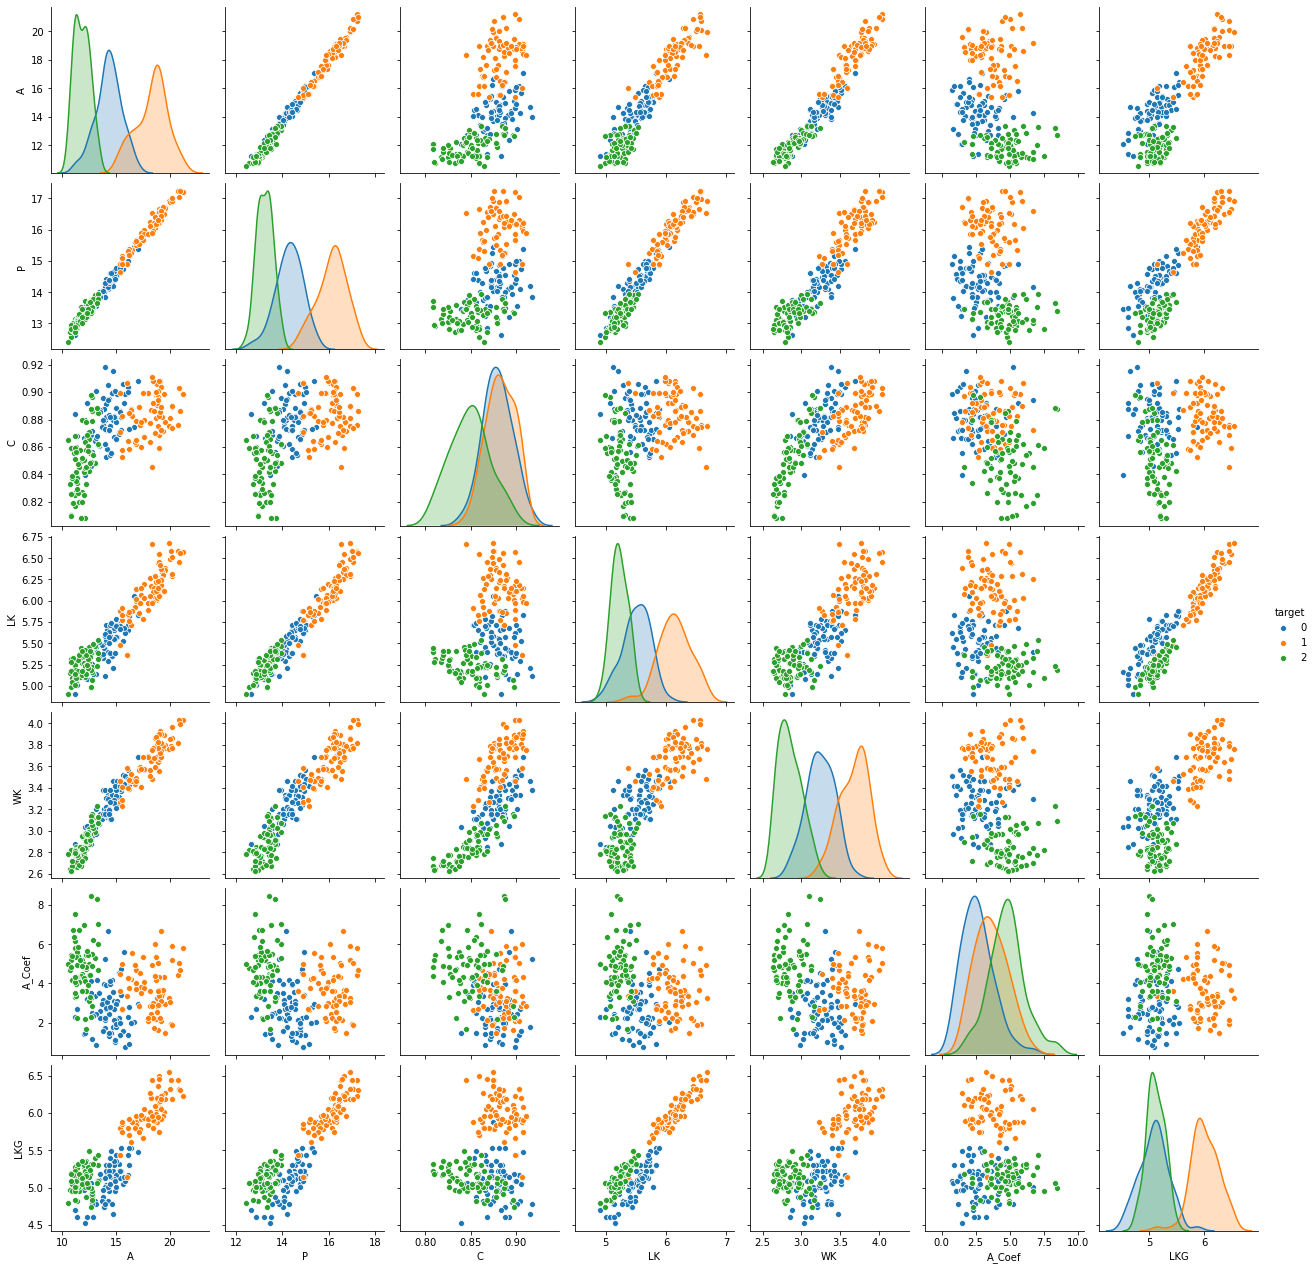

In [20]:
sns.pairplot(data=df,hue = 'target')

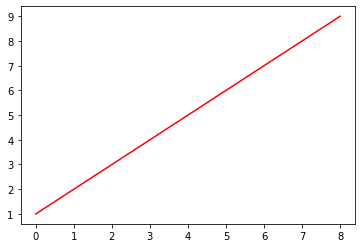

In [21]:
from sklearn.cluster import KMeans
ssd = []
for k in range(1,10):
    kn = KMeans(n_clusters=k)
    kn.fit(df)
    ssd.append(kn.inertia_)

    
plt.plot(range(1,10),color="red")

In [22]:
from sklearn.cluster import KMeans
ssd = []
kn = KMeans(n_clusters=3)
cluster  = kn.fit_predict(df)
df_k = df.copy(deep = True)
df_k['labels'] = cluster

In [23]:
df_k

,A,P,C,LK,WK,A_Coef,LKG,target,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,0
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2,2


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier

In [25]:
de_tree = DecisionTreeClassifier()
de_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
predict_tree = de_tree.predict(x_test)

In [27]:
predict_tree

array([1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 2], dtype=int64)

In [28]:
de_tree.score(x_test,y_test)

0.8867924528301887

In [29]:
accuracy_score(y_test,y_predict)

0.9433962264150944

In [30]:
gv  =GaussianNB()
gv.fit(x_train,y_train)

GaussianNB()

In [31]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
gv.predict(x_test)

array([1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 2], dtype=int64)

In [33]:
gv.score(x_test,y_test)

0.8867924528301887

In [34]:
rf.predict(x_test)

array([1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 2], dtype=int64)

In [37]:
rf.score(x_test,y_predict)

0.9622641509433962

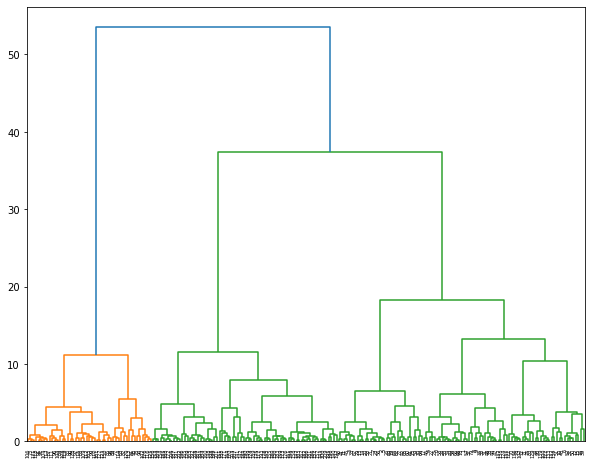

In [39]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,8))
dend = shc.dendrogram(shc.linkage(df,method = "ward"))

In [40]:
dend

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [12.5, 12.5, 47.5, 47.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [93.75, 93.75, 132.5, 132.5],
  [30.0, 30.0, 113.125, 113.125],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [210.0, 210.0, 233.75, 233.75],
  [190.0, 190.0, 221.875, 221.875],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [270.0, 270.0, 300.0, 300.0],
  [205.9375, 205.9375, 285.0, 285.0],
  [162.5, 162.5, 245.46875, 245.46875],
  [71.5625, 71.5625, 203.984375, 203.98437

In [42]:
from sklearn.cluster import AgglomerativeClustering as AC
ac = AC(n_clusters=2,affinity="euclidean",linkage = "ward")
ac.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

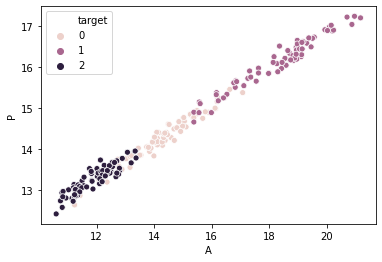

In [47]:
sns.scatterplot(x="A",y="P",hue = 'target',data = df)

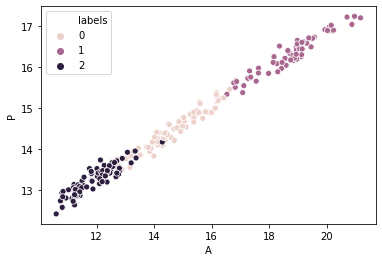

In [50]:
sns.scatterplot(x="A",y="P",hue = 'labels',data = df_k)

In [62]:
from scipy.cluster.hierarchy import linkage,dendrogram
import sklearn.cluster.hierarchichy import hie_clus
df_h= AC(n_clusters=3,affinity='euclidean',linkage = 'ward')
cluster2 = hie_clus.fit_predict(df)
df_h = df.copy(deep = True)
df_h['labels'] = cluster2

SyntaxError: invalid syntax (<ipython-input-62-6b6c68d861e3>, line 2)